In [10]:
from google.colab import files

uploaded = files.upload()




Saving image_class.tar to image_class.tar


In [11]:
import os
os.listdir("/content")

['.config', 'image_class.tar', 'intel_data', 'sample_data']

In [15]:
!mkdir -p /content/intel_data
!tar -xf /content/image_class.tar -C /content/intel_data/

In [18]:
import os
print(os.listdir("/content/intel_data"))
print("Inside image_class:", os.listdir("/content/intel_data/image_class"))

['image_class']
Inside image_class: ['seg_pred', 'seg_train', 'seg_test']


**PART A**

Train classes: ['sea', 'forest', 'glacier', 'street', 'buildings', 'mountain']
Val classes: ['2328.jpg', '1433.jpg', '5793.jpg', '13714.jpg', '22985.jpg', '626.jpg', '4127.jpg', '23129.jpg', '11565.jpg', '6464.jpg', '895.jpg', '3174.jpg', '15224.jpg', '17471.jpg', '1649.jpg', '21449.jpg', '8321.jpg', '22931.jpg', '7243.jpg', '18319.jpg', '17640.jpg', '10680.jpg', '23206.jpg', '15685.jpg', '20258.jpg', '23994.jpg', '129.jpg', '14199.jpg', '14197.jpg', '9900.jpg', '3892.jpg', '2664.jpg', '10561.jpg', '22559.jpg', '6349.jpg', '12361.jpg', '5128.jpg', '17699.jpg', '18488.jpg', '12949.jpg', '19231.jpg', '15406.jpg', '15638.jpg', '13530.jpg', '16299.jpg', '4687.jpg', '5103.jpg', '12325.jpg', '13399.jpg', '18174.jpg', '8158.jpg', '15014.jpg', '6547.jpg', '22300.jpg', '4284.jpg', '4882.jpg', '4298.jpg', '10413.jpg', '12359.jpg', '81.jpg', '20743.jpg', '20715.jpg', '7190.jpg', '2867.jpg', '19634.jpg', '6484.jpg', '4280.jpg', '12607.jpg', '23190.jpg', '22613.jpg', '1448.jpg', '15786.jpg', '15832

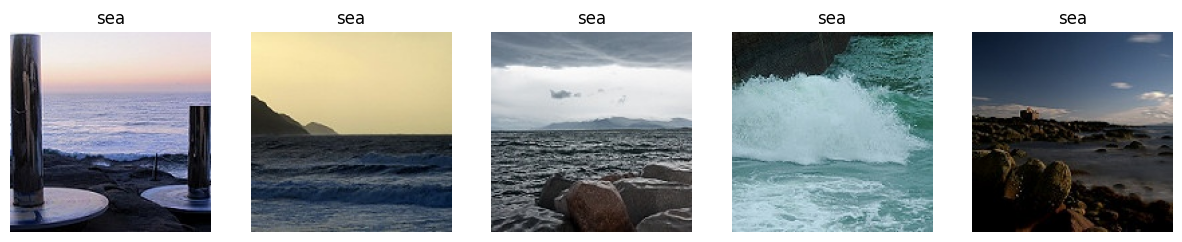

Found 14034 images belonging to 6 classes.
Found 0 images belonging to 0 classes.
Found 3000 images belonging to 6 classes.
Class labels: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [19]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
BASE_DIR  = "/content/intel_data/image_class"
TRAIN_DIR = os.path.join(BASE_DIR, "seg_train")
VAL_DIR   = os.path.join(BASE_DIR, "seg_pred")   # validation
TEST_DIR  = os.path.join(BASE_DIR, "seg_test")

print("Train classes:", os.listdir(TRAIN_DIR))
print("Val classes:", os.listdir(VAL_DIR))
print("Test classes:", os.listdir(TEST_DIR))

# Show sample images
sample_class = os.listdir(TRAIN_DIR)[0]  # first class folder
sample_images = os.listdir(os.path.join(TRAIN_DIR, sample_class))[:5]

plt.figure(figsize=(15,5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(TRAIN_DIR, sample_class, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(sample_class)
    plt.axis("off")
plt.show()

# Image generators
IMG_SIZE = (64, 64)
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

class_labels = list(train_generator.class_indices.keys())
print("Class labels:", class_labels)

**PART B**

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = "/content/intel_data/image_class/seg_train"
val_dir = "/content/intel_data/image_class/seg_test"  # use seg_test as validation

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


Epoch 1/5
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.4743 - loss: 1.2943

878/878 ━━━━━━━━━━━━━━━━━━━━ 115s 129ms/step - accuracy: 0.4744 - loss: 1.2941 - val_accuracy: 0.6823 - val_loss: 0.8015
Epoch 2/5
878/878 ━━━━━━━━━━━━━━━━━━━━ 110s 125ms/step - accuracy: 0.6763 - loss: 0.8621 - val_accuracy: 0.6917 - val_loss: 0.8140
Epoch 3/5
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.7405 - loss: 0.7180

878/878 ━━━━━━━━━━━━━━━━━━━━ 110s 125ms/step - accuracy: 0.7405 - loss: 0.7180 - val_accuracy: 0.7753 - val_loss: 0.6489
Epoch 4/5
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.7766 - loss: 0.6316

878/878 ━━━━━━━━━━━━━━━━━━━━ 145s 128ms/step - accuracy: 0.7766 - loss: 0.6316 - val_accuracy: 0.7843 - val_loss: 0.5849
Epoch 5/5
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.7969 - loss: 0.5792

878/878 ━━━━━━━━━━━━━━━━━━━━ 110s 125ms/step - accuracy: 0.7969 - loss: 0.5792 - val_accuracy: 0.8220 - val_loss: 0.5163


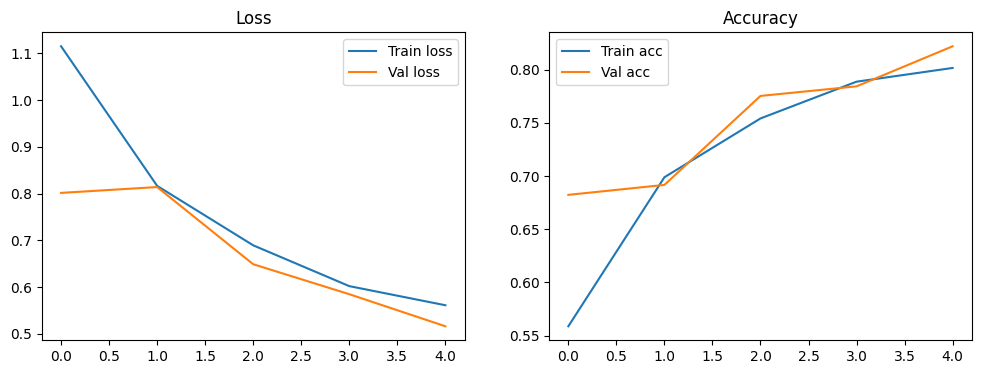

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models

# CNN Architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(64,64,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels), activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Training with EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_cnn_model.h5", save_best_only=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[early_stop, checkpoint]
)

# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val loss")
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train acc")
plt.plot(history.history["val_accuracy"], label="Val acc")
plt.legend()
plt.title("Accuracy")
plt.show()

**PART C**

  1/188 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.7500 - loss: 0.6101

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8235 - loss: 0.5207
✅ Test Accuracy: 82.20%
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step
Class Labels: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

📊 Classification Report:

              precision    recall  f1-score   support

   buildings       0.82      0.80      0.81       437
      forest       0.94      0.95      0.95       474
     glacier       0.76      0.81      0.78       553
    mountain       0.79      0.75      0.77       525
         sea       0.79      0.79      0.79       510
      street       0.85      0.84      0.85       501

    accuracy                           0.82      3000
   macro avg       0.83      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



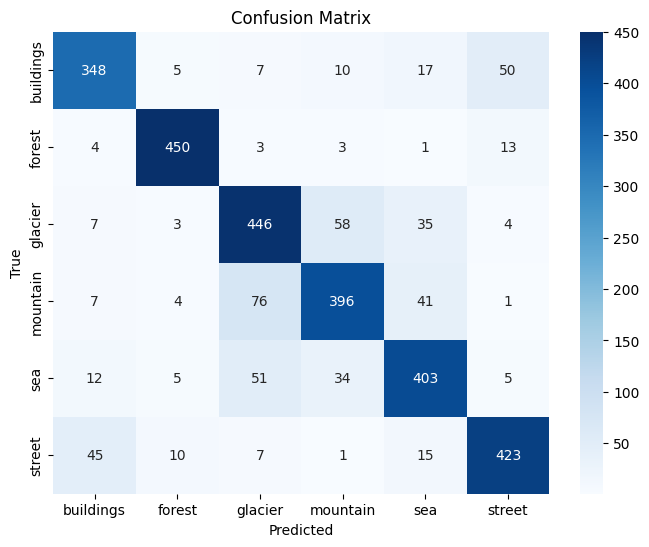

In [31]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Load best model (if you used ModelCheckpoint)
# model = load_model("best_cnn_model.h5")

# 1) Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")

# 2) Predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# 3) Class labels
class_labels = list(test_generator.class_indices.keys())
print("Class Labels:", class_labels)

# 4) Classification report
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# 5) Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

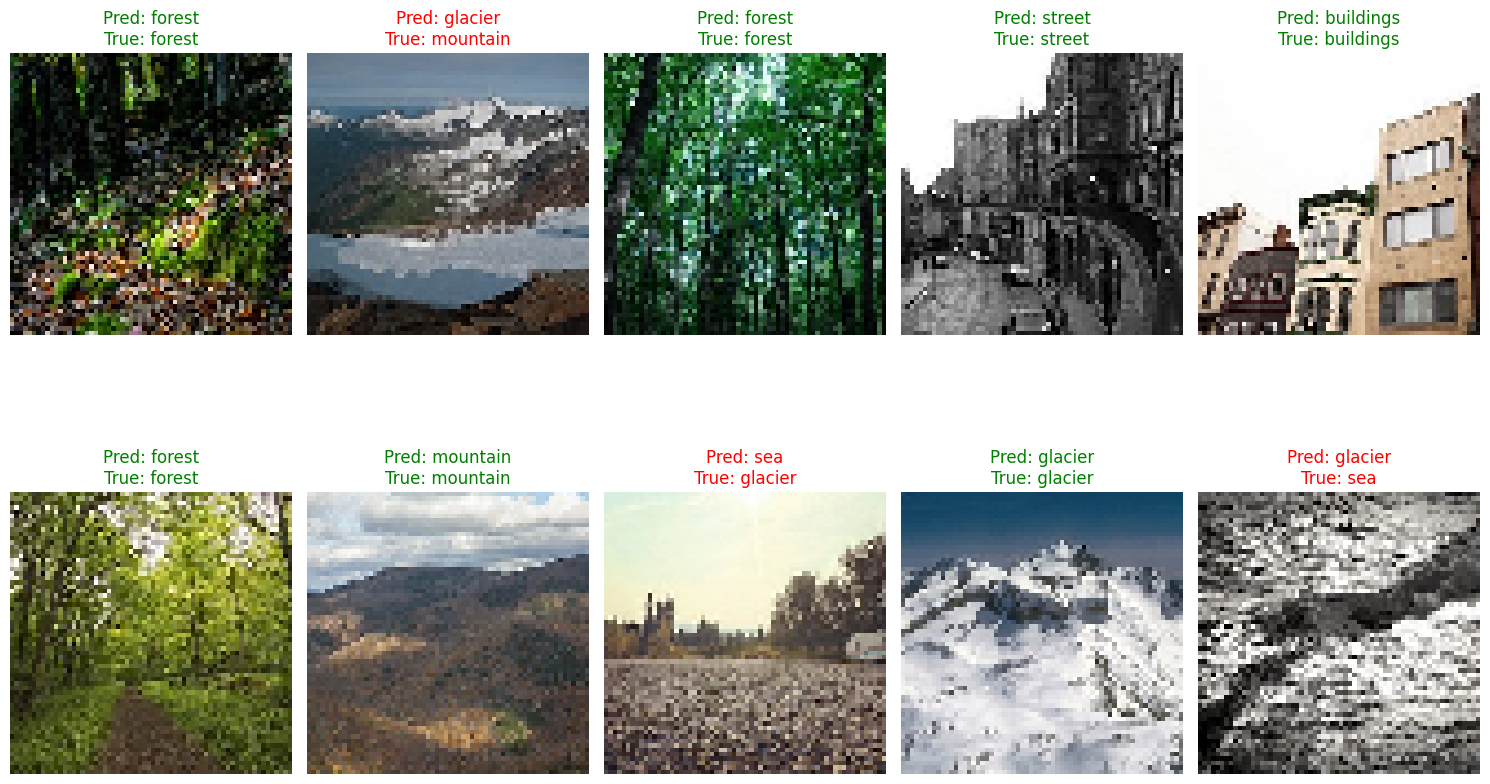

In [36]:
import random
import matplotlib.pyplot as plt

# Pick 10 random indices from test set
random_indices = random.sample(range(len(test_generator.filenames)), 10)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(random_indices):
    # Load the image
    img_path = os.path.join(test_generator.directory, test_generator.filenames[idx])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64,64))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array, verbose=0)
    pred_class = np.argmax(pred, axis=1)[0]
    true_class = y_true[idx]

    # Plot
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Pred: {class_labels[pred_class]}\nTrue: {class_labels[true_class]}",
              color="green" if pred_class == true_class else "red")

plt.tight_layout()
plt.show()